# Importing

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# Pre Processing

In [2]:
data = pd.read_csv('spam_dataset.csv')

X = data['text']  # Features - the email text
y = data['label_num']  # Target variable - spam or not spam

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
x_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)
    


# Default Model (No modified Parameters)

In [16]:
basic_model = MultinomialNB()
basic_model.fit(X_train, y_train)

y_pred = basic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9449275362318841
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.88      0.93      0.91       293

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035



# Train/Tune Model


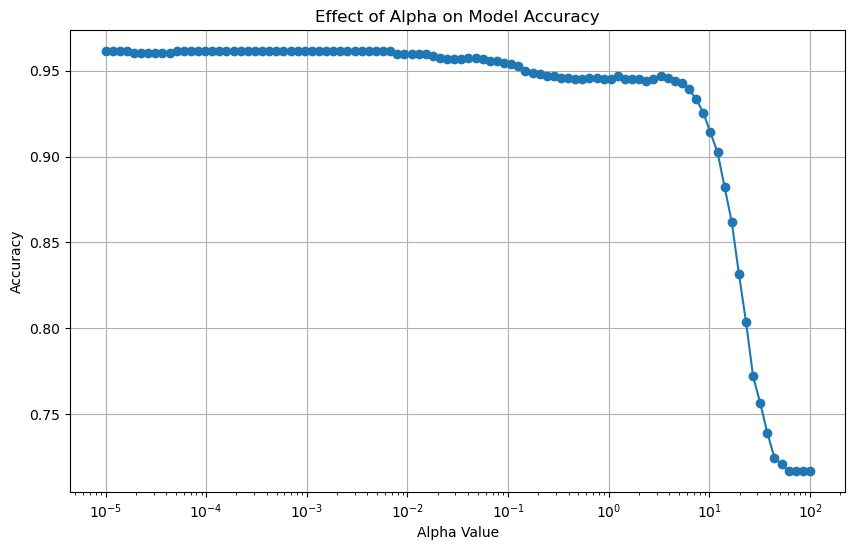

In [7]:
# insert model code here

alpha_values = np.logspace(-5, 2, 100)
accuracy_scores = []

for alpha in alpha_values:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')
plt.title('Effect of Alpha on MultinomialNB Model Accuracy')
plt.grid(True)
plt.show()


# Test Model

In [14]:
# zz insert model code here
best_model = MultinomialNB(alpha=1.0e-10)
best_model.fit(X_train, y_train)

MultinomialNB(alpha=1e-10)

# Evaluate

In [15]:
# Default Model:
basic_model_pred = basic_model.predict(X_test)

# # Calculate accuracy for the basic Logistic Regression model
basic_model_accuracy = accuracy_score(y_test, basic_model_pred)
print(f"Basic Model Accuracy: {basic_model_accuracy:.4f}")

# Tuned Model:
best_model_pred = best_model.predict(X_test)

# Calculate accuracy for the tuned Logistic Regression model
best_model_accuracy = accuracy_score(y_test, best_model_pred)
print(f"Tuned Model Accuracy: {best_model_accuracy:.4f}")

# Show improvement
print("\nImprovement in accuracy:")
print(f"Model: {best_model_accuracy - basic_model_accuracy:.4f}")



Basic Model Accuracy: 0.9449
Tuned Model Accuracy: 0.9623

Improvement in accuracy:
Model: 0.0174
